In [33]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
def mse(e):
    """Calculate the mse for vector e."""
    return 1 / 2 * np.mean(e**2)


def mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))

In [35]:
def compute_loss(y, tx, w, cost_f):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    
    e = y - tx @ w
    return cost_f(e)

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [36]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.solve(tx.T @ tx, tx.T @ y)
    e = y - tx @ w
    mse = 1 / 2 * np.mean(e**2)
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [37]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return least_squares(y, tx)

Test it here

In [38]:
test_your_least_squares()

(15.3858878688294, array([73.293922  , 13.47971243]))

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [39]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [40]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [41]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y, poly)
        rmse = np.sqrt(2 * mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.7078805834165345
Processing 2th experiment, degree=3, rmse=0.46698196895441413
Processing 3th experiment, degree=7, rmse=0.24969890274509327
Processing 4th experiment, degree=12, rmse=0.24413458367233676


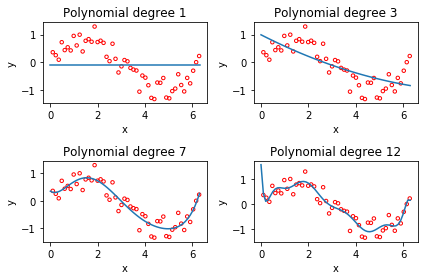

In [42]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [43]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    num_row = y.shape[0]
    indices = np.random.permutation(num_row)
    
    index_split = int(np.floor(ratio * num_row))
    index_train = indices[:index_split]
    index_test = indices[index_split:]

    x_train = x[index_train]
    x_test = x[index_test]
    y_train = y[index_train]
    y_test = y[index_test]
    
    return x_train, x_test, y_train, y_test

Then, test your `split_data` function below.

In [44]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse_tr, w_tr = least_squares(y_train, x_train)
    
    rmse_tr = np.sqrt(2 * mse_tr)
    rmse_te = np.sqrt(2 * compute_loss(y_test, x_test, w_tr, mse))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [45]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.734, Testing RMSE=0.403
proportion=0.9, degree=3, Training RMSE=0.487, Testing RMSE=0.211
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.214
proportion=0.9, degree=12, Training RMSE=0.244, Testing RMSE=0.275
proportion=0.5, degree=1, Training RMSE=0.795, Testing RMSE=0.611
proportion=0.5, degree=3, Training RMSE=0.451, Testing RMSE=0.565
proportion=0.5, degree=7, Training RMSE=0.233, Testing RMSE=0.282
proportion=0.5, degree=12, Training RMSE=0.207, Testing RMSE=0.385
proportion=0.1, degree=1, Training RMSE=0.820, Testing RMSE=0.805
proportion=0.1, degree=3, Training RMSE=0.279, Testing RMSE=0.686
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.577
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.514


# 3 Ridge Regression
Please fill in the function below.

In [25]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    return np.linalg.solve(tx.T @ tx + lambda_ * 2 * tx.shape[0] * np.identity(tx.shape[1]), tx.T @ y)

In [26]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w_tr = ridge_regression(y_train, x_train, lambda_)
        
        rmse_tr.append(np.sqrt(2 * compute_loss(y_train, x_train, w_tr, mse)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_test, x_test, w_tr, mse)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.332
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.328
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.233, Testing RMSE=0.314
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.240, Testing RMSE=0.295
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.255, Testing RMSE=0.289
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.274, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.193, 

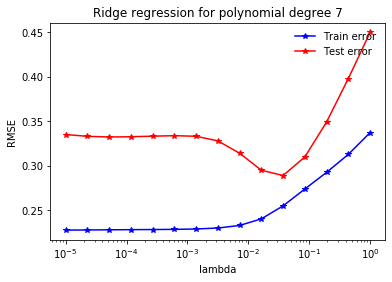

In [27]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)